Reinforcement Learning: Monte Carlo Policy Evaluation

In [1]:
import numpy as np

In [2]:
class State: # a class to generate states in an MDP
    
    # initialize the state
    def __init__(self, state_name, actions, probabilities, rewards):
        
        self.state_name = state_name
        self.actions = actions
        self.probabilities = probabilities
        self.rewards = rewards       
        self.counter = 0
        self.visits = 0
        self.active = False
        self.running_return = 0
    

In [3]:
class MDP: # a class to generate an MDP from given input data
    
    # initialize the MDP
    def __init__(self, statespace, probabilities, rewards, actions, discount):
        
        # check dimensionality
        
        if (probabilities.shape[0] != actions.shape[0]) or (probabilities.shape[1] != statespace.shape[0]):
            print("ERROR: Incorrect dimensionality: probability matrix does not match actions and state space!")
            
        if (rewards.shape[0] != actions.shape[0]) or (rewards.shape[1] != statespace.shape[0]):
            print("ERROR: Incorrect dimensionality: reward matrix does not match actions and state space!")
        
        else:
            
            # parameter initialization
            self.statespace = statespace
            self.discount = discount
            
            self.states = [] # a list to hold objects
            for i in range(len(self.statespace)):
                self.states.append(State(i, actions, probabilities[i], rewards[i]))
            
            # performance indicators
            self.iterations = 0
            
            #print("Initialized MDP")
            #print("-------------------------------------")
    
    # define a function to generate a random state at the beginning of the process
    def init_random_state(self):
        self.currentstate = np.random.choice(self.states, size=1, replace=False)[0]
        self.currentstate.active = True # activate new state
        #print("Initial state:", self.currentstate.state_name)
        #print("-------------------------------------")
    
    # define a function to perform an action on the MDP, which causes the state evolution
    def perform_action(self, action): # record data based on first visit policy
        
        self.iterations += 1
        #print("Iteration: ", self.iterations)
        
        
        
        if action in self.currentstate.actions: # perform action if it does exist in the set of actions of a state
            nextstate = np.random.choice(self.states, 
                                         p = self.currentstate.probabilities[action],
                                         size=1, replace=False)[0]
            
        else: # if action does not exist, raise an error and choose one randomly
            print("Action not available in current state")
            print("Choosing randoms action instead!")
            action = np.random.choice(self.currentstate.actions, size=1, replace=False)[0]
            nextstate = np.random.choice(self.states, 
                                         p = self.currentstate.probabilities[action], 
                                         size=1, replace=False)[0]
        
                
        # update rewards and counter
        if nextstate.active == False:
            nextstate.running_return += (self.discount ** self.iterations) * self.currentstate.rewards[action, nextstate.state_name]
                
        # update visits and check whether state has been visited before
        #print("Next state: ", nextstate.state_name)
        nextstate.visits += 1 # update number of visits of state
        if nextstate.active == False: # if state not visited before, activate
            nextstate.active = True
                
        # print statistics to keep track of evolution
        #for i in self.states:
        #    print("Visits of state", i.state_name, ":", i.visits)
        #for i in self.states:
        #    print("Running reward of state", i.state_name, ":", i.running_return)
            
        # update the current state
        self.currentstate = nextstate
        #print("-------------------------------------")
    

In [4]:
# Example data
probabilities = np.array([[[0.1, 0.9],
                          [0.7, 0.3]],
                          
                          [[0.2, 0.8],
                          [0.5, 0.5]]])

rewards = np.array([[[1, 4],
                    [-2, 5]],
                    
                    [[3, -2],
                    [7, 5]]])

statespace = np.array([0,1])

actions = np.array([0,1])

discount = 0.9

In [5]:
# a function to generate all possible policies
def generate_policies(statespace, actions): #only works for statespace of 2
    
    options = np.array(np.meshgrid(statespace, actions)).T.reshape(-1,2)
    #print(options)
    policies = []
    for j in options:
        if j[0] == 0:
            for k in options:
                if k[0] != 0:
                    policies.append(np.array([j,k]))
                    
    return(policies)

In [6]:
policies = generate_policies(statespace, actions)

In [7]:
# initialize value functions and returns
J = [[[] for _ in range(len(statespace))] for _ in range(len(policies))]
Returns = [[[] for _ in range(len(statespace))] for _ in range(len(policies))]

for k in range(len(policies)):
    # initialize policy
    policy = policies[k]
    
    np.random.seed(k * 2) # set random seed

    # initialize number of episodes
    episodes = 1000 # tested empirically to show convergence
    # initialize number of steps per episode
    steps = 100 # tested emprically to be a reasonable number

    for j in range(episodes):

        #print("Episode", j)

        #initialize MDP with random state
        mdp = MDP(statespace, probabilities, rewards, actions, discount)
        mdp.init_random_state()

        # iterate through all steps on each episode
        for i in range(steps):
            active_state = mdp.currentstate.state_name # obtain active state
            mdp.perform_action(policy[active_state][1]) # execute action as per policy

        # append returns list after the episode (consider that discountin was done in the MDP)
        for i in mdp.states:
            Returns[k][i.state_name].append(i.running_return)
            J[k][i.state_name].append(np.mean(Returns[k][i.state_name]))


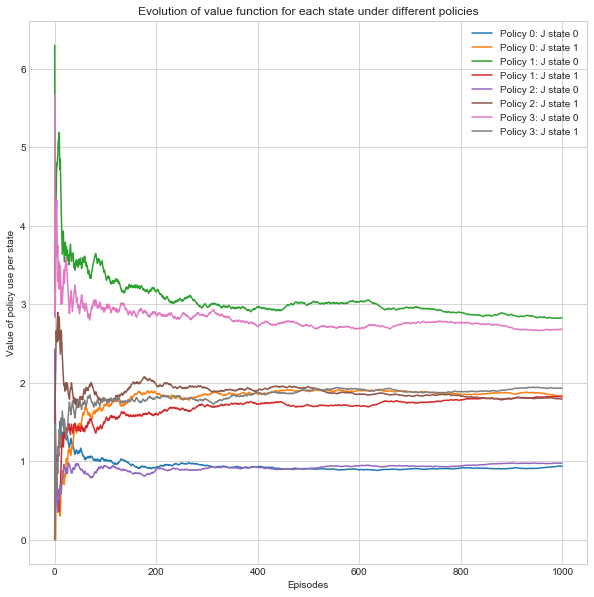

In [8]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.figure(figsize=[10,10])

t = range(episodes)

pol0_J0 = J[0][0]
pol0_J1 = J[0][1]
pol1_J0 = J[1][0]
pol1_J1 = J[1][1]
pol2_J0 = J[2][0]
pol2_J1 = J[2][1]
pol3_J0 = J[3][0]
pol3_J1 = J[3][1]

#plot2 = plt.subplot(122)
plt.plot(t, pol0_J0, label = 'Policy 0: J state 0')
plt.plot(t, pol0_J1, label = 'Policy 0: J state 1')
plt.plot(t, pol1_J0, label = 'Policy 1: J state 0')
plt.plot(t, pol1_J1, label = 'Policy 1: J state 1')
plt.plot(t, pol2_J0, label = 'Policy 2: J state 0')
plt.plot(t, pol2_J1, label = 'Policy 2: J state 1')
plt.plot(t, pol3_J0, label = 'Policy 3: J state 0')
plt.plot(t, pol3_J1, label = 'Policy 3: J state 1')

plt.xlabel("Episodes")
plt.ylabel("Value of policy use per state")
plt.legend(loc="upper right")
plt.title("Evolution of value function for each state under different policies")


#plt.savefig('Results.png', dpi = 800)

plt.show()